In [1]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn import preprocessing

%matplotlib inline
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.externals import joblib
# Import GridSearch
from sklearn.model_selection import GridSearchCV

In [3]:
data = pd.read_csv('data_nona.csv', parse_dates=['date'], index_col=['date'], dayfirst=True)

In [4]:
# features = ['mill_dp_mbar_pv_1',
#             'mill_dp_mbar_pv_2',
#             'mill_dp_mbar_pv_3',
#             'mill_dp_mbar_pv_4',
#             'mill_dp_mbar_pv_5',
#             'total_feed_ton_h_pv_7',
#             'total_feed_ton_h_pv_8',
#             'total_feed_ton_h_pv_9',
#             'total_feed_ton_h_pv_10',
#             'total_feed_ton_h_pv_11',
#             'total_feed_ton_h_pv_12',
#             'fly_ash_1_perc_pv_17', 
#             'fly_ash_1_perc_pv_18',
#             'fly_ash_1_perc_pv_19',
#             'fly_ash_1_perc_pv_20',
#             'fly_ash_1_perc_pv_21',
#             'fly_ash_1_perc_pv_22',
#             'fly_ash_2_perc_pv_17',
#             'fly_ash_2_perc_pv_18',
#             'fly_ash_2_perc_pv_19',
#             'fly_ash_2_perc_pv_20',
#             'fly_ash_2_perc_pv_21', 
#             'fly_ash_2_perc_pv_22',
#             'fan_speed_rpm_pv_5',
#             'fan_speed_rpm_pv_6',
#             'fan_speed_rpm_pv_7',
#             'fan_speed_rpm_pv_8',
#             'fan_speed_rpm_pv_9',
#             'fan_speed_rpm_pv_10',
#             'separator_speed_rpm_pv_3',
#             'separator_speed_rpm_pv_4',
#             'separator_speed_rpm_pv_5',
#             'separator_speed_rpm_pv_6',
#             'separator_speed_rpm_pv_7',
#             'separator_speed_rpm_pv_8',
#             'grinding_pressure_bar_pv_5',
#             'grinding_pressure_bar_pv_6',
#             'grinding_pressure_bar_pv_7',
#             'grinding_pressure_bar_pv_8',
#             'grinding_pressure_bar_pv_9',
#             'grinding_pressure_bar_pv_10',
#             'mill_injection_water_m3_h_pv_4',
#             'mill_injection_water_m3_h_pv_5',
#             'mill_injection_water_m3_h_pv_6',
#             'mill_injection_water_m3_h_pv_7',
#             'mill_injection_water_m3_h_pv_8',
#             'mill_injection_water_m3_h_pv_9',
#             'bucket_elv_mtr_pwr_kw_pv_5',
#             'bucket_elv_mtr_pwr_kw_pv_6',
#             'bucket_elv_mtr_pwr_kw_pv_7',
#             'bucket_elv_mtr_pwr_kw_pv_8',
#             'bucket_elv_mtr_pwr_kw_pv_9',
#             'bucket_elv_mtr_pwr_kw_pv_10']

# X = data[:'2019-09-30 23:59:59'][features]
# y = data[:'2019-09-30 23:59:59']['mill_dp_mbar_pv']

# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [5]:
# # Split to train and test sets
train_data = data.loc[:'2019-09-30 23:59:00']
test_data = data.loc['2019-10-01 00:00:00':]

In [6]:
features = ['mill_dp_mbar_pv_1',
            'mill_dp_mbar_pv_2',
            'mill_dp_mbar_pv_3',
            'mill_dp_mbar_pv_4',
            'mill_dp_mbar_pv_5',
            'total_feed_ton_h_pv_7',
            'total_feed_ton_h_pv_8',
            'total_feed_ton_h_pv_9',
            'total_feed_ton_h_pv_10',
            'total_feed_ton_h_pv_11',
            'total_feed_ton_h_pv_12',
            'fly_ash_1_perc_pv_17', 
            'fly_ash_1_perc_pv_18',
            'fly_ash_1_perc_pv_19',
            'fly_ash_1_perc_pv_20',
            'fly_ash_1_perc_pv_21',
            'fly_ash_1_perc_pv_22',
            'fly_ash_2_perc_pv_17',
            'fly_ash_2_perc_pv_18',
            'fly_ash_2_perc_pv_19',
            'fly_ash_2_perc_pv_20',
            'fly_ash_2_perc_pv_21', 
            'fly_ash_2_perc_pv_22',
            'fan_speed_rpm_pv_5',
            'fan_speed_rpm_pv_6',
            'fan_speed_rpm_pv_7',
            'fan_speed_rpm_pv_8',
            'fan_speed_rpm_pv_9',
            'fan_speed_rpm_pv_10',
            'separator_speed_rpm_pv_3',
            'separator_speed_rpm_pv_4',
            'separator_speed_rpm_pv_5',
            'separator_speed_rpm_pv_6',
            'separator_speed_rpm_pv_7',
            'separator_speed_rpm_pv_8',
            'grinding_pressure_bar_pv_5',
            'grinding_pressure_bar_pv_6',
            'grinding_pressure_bar_pv_7',
            'grinding_pressure_bar_pv_8',
            'grinding_pressure_bar_pv_9',
            'grinding_pressure_bar_pv_10',
            'mill_injection_water_m3_h_pv_4',
            'mill_injection_water_m3_h_pv_5',
            'mill_injection_water_m3_h_pv_6',
            'mill_injection_water_m3_h_pv_7',
            'mill_injection_water_m3_h_pv_8',
            'mill_injection_water_m3_h_pv_9',
            'bucket_elv_mtr_pwr_kw_pv_5',
            'bucket_elv_mtr_pwr_kw_pv_6',
            'bucket_elv_mtr_pwr_kw_pv_7',
            'bucket_elv_mtr_pwr_kw_pv_8',
            'bucket_elv_mtr_pwr_kw_pv_9',
            'bucket_elv_mtr_pwr_kw_pv_10']
# X = home_data[features]
X_train = train_data[features]
y_train = train_data['mill_dp_mbar_pv']

In [7]:
# Create X test and y test
X_test = test_data[features]
y_test = test_data['mill_dp_mbar_pv']

In [8]:
# # Scale the sets in needed
# sc = StandardScaler()

# # sc.fit(X_tr)
# # X_tr_sc = sc.transform(X_tr)
# # X_ts_sc = sc.transform(X_ts)

# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [9]:
X_train

,mill_dp_mbar_pv_1,mill_dp_mbar_pv_2,mill_dp_mbar_pv_3,mill_dp_mbar_pv_4,mill_dp_mbar_pv_5,total_feed_ton_h_pv_7,total_feed_ton_h_pv_8,total_feed_ton_h_pv_9,total_feed_ton_h_pv_10,total_feed_ton_h_pv_11,...,mill_injection_water_m3_h_pv_6,mill_injection_water_m3_h_pv_7,mill_injection_water_m3_h_pv_8,mill_injection_water_m3_h_pv_9,bucket_elv_mtr_pwr_kw_pv_5,bucket_elv_mtr_pwr_kw_pv_6,bucket_elv_mtr_pwr_kw_pv_7,bucket_elv_mtr_pwr_kw_pv_8,bucket_elv_mtr_pwr_kw_pv_9,bucket_elv_mtr_pwr_kw_pv_10
date,,,,,,,,,,,,,,,,,,,,,
2019-05-11 03:15:00,32.940,33.220,33.275,33.225,32.945,84.880,84.670,84.490,84.680,84.675,...,2.460,2.455,2.465,2.460,4.915,4.910,4.945,4.975,4.920,4.980
2019-05-11 09:01:00,32.145,32.040,31.730,32.455,32.815,84.570,84.595,83.820,83.770,83.715,...,2.690,2.690,2.695,2.690,4.785,4.765,4.780,4.810,4.790,4.800
2019-05-11 09:02:00,32.650,32.145,32.040,31.730,32.455,84.655,84.570,84.595,83.820,83.770,...,2.690,2.690,2.690,2.695,4.780,4.785,4.765,4.780,4.810,4.790
2019-05-11 09:03:00,32.420,32.650,32.145,32.040,31.730,84.775,84.655,84.570,84.595,83.820,...,2.695,2.690,2.690,2.690,4.785,4.780,4.785,4.765,4.780,4.810
2019-05-11 09:04:00,31.985,32.420,32.650,32.145,32.040,84.690,84.775,84.655,84.570,84.595,...,2.690,2.695,2.690,2.690,4.780,4.785,4.780,4.785,4.765,4.780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:55:00,35.630,35.600,35.755,35.275,35.090,91.470,91.475,90.930,91.545,91.635,...,1.635,1.630,1.635,1.635,4.905,4.945,4.940,4.950,4.980,4.930
2019-09-30 23:56:00,35.510,35.630,35.600,35.755,35.275,90.115,91.470,91.475,90.930,91.545,...,1.630,1.635,1.630,1.635,4.945,4.905,4.945,4.940,4.950,4.980
2019-09-30 23:57:00,35.485,35.510,35.630,35.600,35.755,91.635,90.115,91.470,91.475,90.930,...,1.630,1.630,1.635,1.630,4.965,4.945,4.905,4.945,4.940,4.950


# Correlation Matrix

In [10]:
# # GETTING Correllation matrix
# corr_mat=data.corr(method='pearson')
# plt.figure(figsize=(20,20))
# sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

## Linear Regression

In [11]:
# Import Model
from sklearn.linear_model import LinearRegression

In [12]:
# Define Model, Fit Predict
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lr_preds = lin_reg.predict(X_test)

lr_preds_train = lin_reg.predict(X_train)

# Mean Absolute Error and Mean Squared Error
lr_mae = mean_absolute_error(y_test, lr_preds)
lr_mse = mean_squared_error(y_test, lr_preds)

lr_mae_train = mean_absolute_error(y_train, lr_preds_train)
lr_mse_train = mean_squared_error(y_train, lr_preds_train)

print('Linear Regression test data: ', lr_mae, lr_mse)
print('Linear Regression train data: ', lr_mae_train, lr_mse_train)

Linear Regression test data:  0.45370138191482245 0.406163799122347
Linear Regression train data:  0.4474922549743962 0.41384976774928506


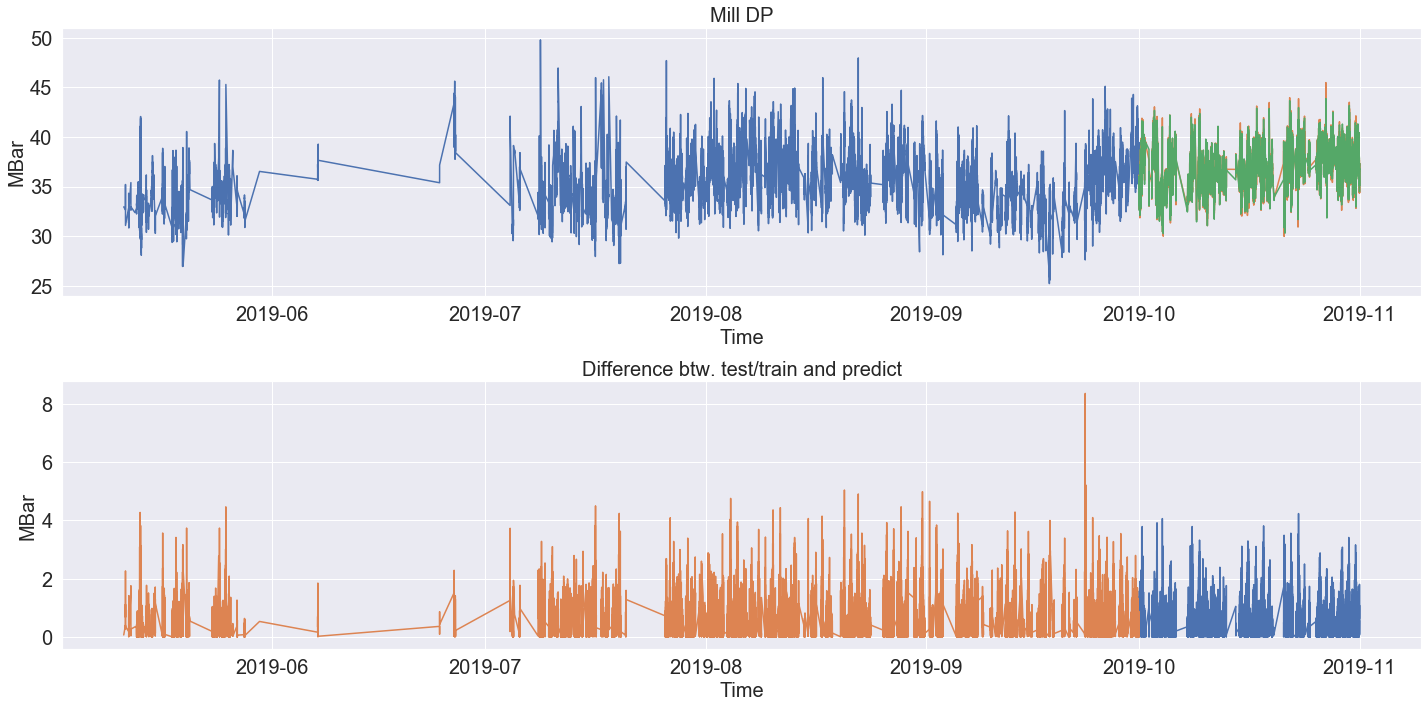

In [13]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.tick_params(labelsize=20)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, lr_preds, label='predict')
ax.set_title('Mill DP', size=20)
ax.set_xlabel('Time', size=20)
ax.set_ylabel('MBar', size=20)
# ax.legend(fontsize='xx-large')

ax2 = plt.subplot(212)
ax2.tick_params(labelsize=20)
ax2.plot(np.abs(lr_preds - y_test), label='test')
ax2.plot(np.abs(lr_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict', size=20)
ax2.set_xlabel('Time', size=20)
ax2.set_ylabel('MBar', size=20)
# ax2.legend(fontsize='xx-large')

plt.tight_layout()
plt.savefig('Linear_Task2.png')

## Lasso

In [14]:
# Define Model with Grid, Fit Predict
from sklearn.linear_model import Lasso
param_grid = {'alpha': [int(x) for x in np.linspace(0.1, 10, num = 10)]}
las_reg = GridSearchCV(Lasso(), param_grid, cv=5)
las_reg.fit(X_train, y_train)
ls_preds = las_reg.predict(X_test)

ls_preds_train = las_reg.predict(X_train) 

# Mean Absolute Error and Mean Squared Error
ls_mae = mean_absolute_error(y_test, ls_preds)
ls_mse = mean_squared_error(y_test, ls_preds)

ls_mae_train = mean_absolute_error(y_train, ls_preds_train)
ls_mse_train = mean_squared_error(y_train, ls_preds_train)

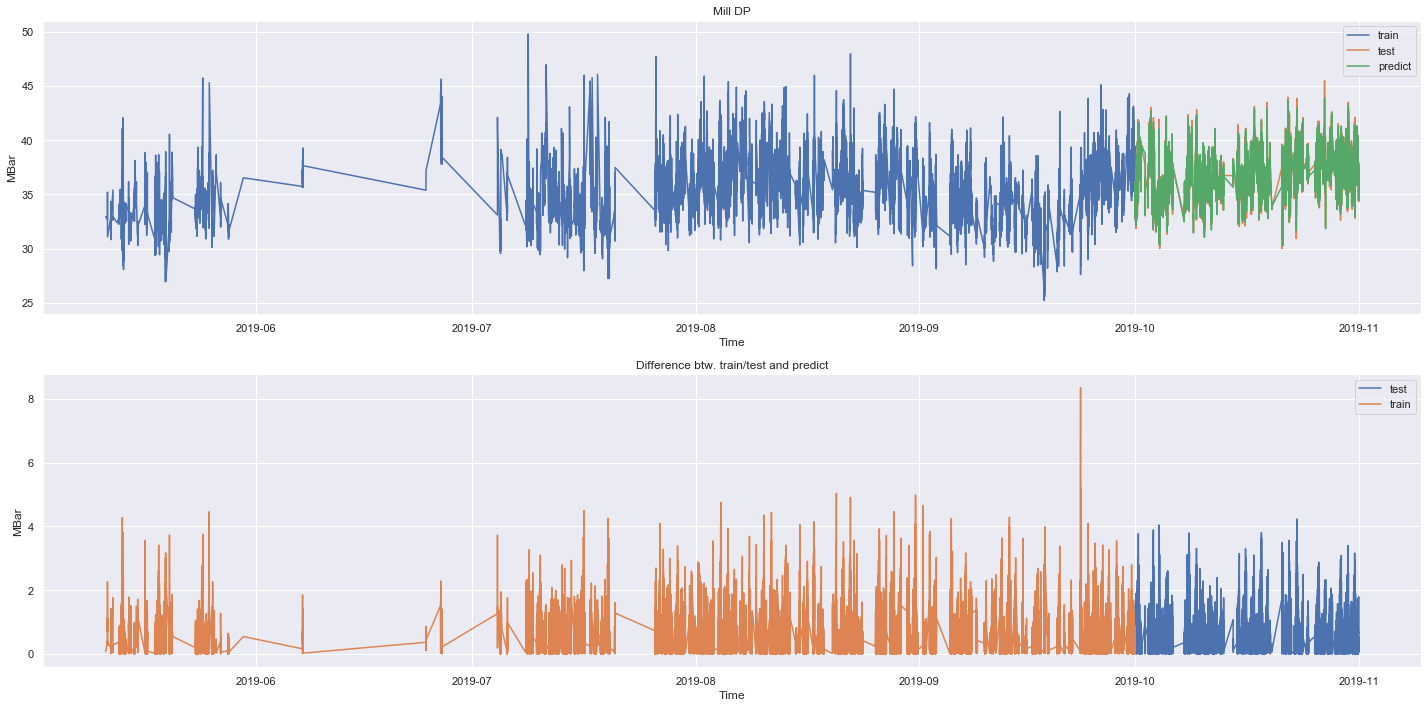

In [15]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, ls_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(ls_preds - y_test), label='test')
ax2.plot(np.abs(ls_preds_train - y_train), label='train')
ax2.set_title('Difference btw. train/test and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

## Ridge

In [16]:
# Define Model with Grid, Fit Predict
from sklearn.linear_model import Ridge
rid_reg = GridSearchCV(Ridge(), param_grid, cv=5)
rid_reg.fit(X_train, y_train)
rd_preds = rid_reg.predict(X_test)
rd_preds_train = rid_reg.predict(X_train)


# Mean Absolute Error and Mean Squared Error
rd_mae = mean_absolute_error(y_test, rd_preds)
rd_mse = mean_squared_error(y_test, rd_preds)

rd_mae_train = mean_absolute_error(y_train, rd_preds_train)
rd_mse_train = mean_squared_error(y_train, rd_preds_train)

print('Linear Regression: ', lr_mae, lr_mse)
print('Lasso with Grid: ', ls_mae, ls_mse)
print('Ridge with Grid: ', rd_mae, rd_mse)
print('----------train----------')
print('Linear Regression: ', lr_mae_train, lr_mse_train)
print('Lasso with Grid: ', ls_mae_train, ls_mse_train)
print('Ridge with Grid: ', rd_mae_train, rd_mse_train)

Linear Regression:  0.45370138191482245 0.406163799122347
Lasso with Grid:  0.4536116658434974 0.40597700632805017
Ridge with Grid:  0.4535332103048851 0.4059355615198083
----------train----------
Linear Regression:  0.4474922549743962 0.41384976774928506
Lasso with Grid:  0.4475147390031195 0.413918283161144
Ridge with Grid:  0.44746720621165514 0.4138573548645207


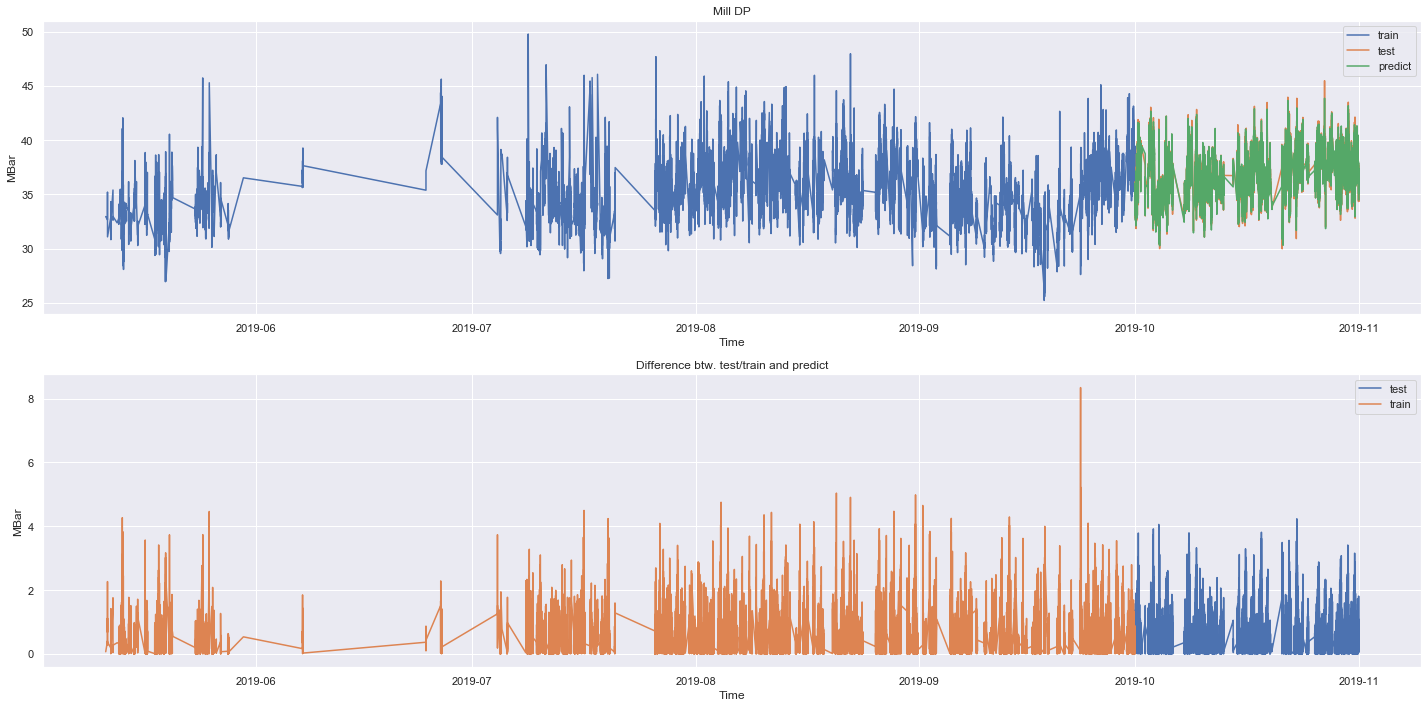

In [17]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, rd_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(rd_preds - y_test), label='test')
ax2.plot(np.abs(rd_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

In [18]:
las_reg.best_params_

{'alpha': 0}

In [19]:
rid_reg.best_params_

{'alpha': 6}

In [20]:
las_reg.best_estimator_.coef_

array([ 1.13773845e+00, -3.52501188e-01,  1.10115029e-01, -3.54684621e-02,
        8.96066599e-02,  2.08492633e-02,  2.52916867e-03, -8.38574924e-03,
        1.57716113e-03,  8.63353051e-03, -1.16413683e-02, -7.44343220e-03,
        2.64545473e-03, -2.57776674e-03,  9.06034784e-04, -7.05902292e-03,
        2.60824589e-03, -6.04244385e-03, -3.39337379e-04, -7.48357769e-03,
       -9.12091431e-04,  1.21028128e-02, -8.29733063e-03,  3.72312135e-03,
       -5.56258459e-05, -8.24073670e-04, -7.70142071e-05, -1.53459756e-03,
       -1.11587967e-03,  2.54978788e-03,  1.09849642e-03,  6.82006678e-04,
       -1.31623695e-04, -1.61347290e-04, -2.11923173e-03, -9.43438591e-04,
       -4.35315685e-03, -2.95667418e-03,  7.85014839e-04,  1.57861796e-03,
        8.45370893e-04, -5.14620653e-02, -6.97897038e-02,  1.00796566e-01,
       -2.25680142e-02, -1.85048479e-02,  8.72979460e-02,  6.09246538e-01,
        5.47424913e-02, -3.27916359e-02, -7.20371472e-02,  3.49262966e-03,
       -4.59310098e-01])

## Tree Regression

In [21]:
# Import Model
from sklearn.tree import DecisionTreeRegressor

# Define Model with Grid, Fit Predict
tree_grid = {'criterion': ['mse', 'mae'],
             'max_depth': [None]}
dt = GridSearchCV(DecisionTreeRegressor(),tree_grid, cv=2) # Cross-validation 5 fores
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)
dt_preds_train = dt.predict(X_train)
# Mean Absolute Error and Mean Squared Error
dt_mae = mean_absolute_error(y_test, dt_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
dt_mae_train = mean_absolute_error(y_train, dt_preds_train)
dt_mse_train = mean_squared_error(y_train, dt_preds_train)

print('Decision Tree Regression: ', dt_mae, dt_mse)
print('Decision Tree Regression: ', dt_mae_train, dt_mse_train)

Decision Tree Regression:  0.7601115770943356 1.0477054403541473
Decision Tree Regression:  2.547209775145466e-17 1.809901402186729e-31


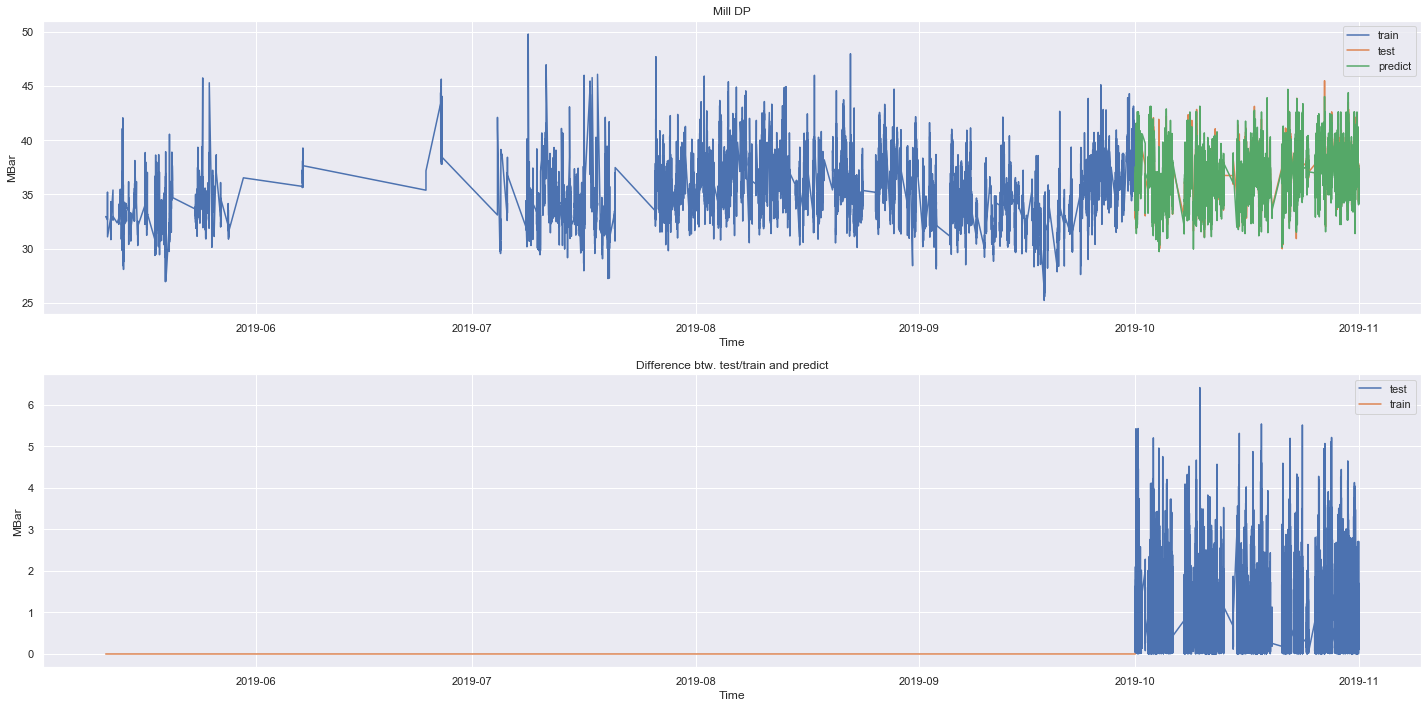

In [22]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, dt_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(dt_preds - y_test), label='test')
ax2.plot(np.abs(dt_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

## Random Forest

In [23]:
# Import Model
from sklearn.ensemble import RandomForestRegressor

# Define Model with Grid, Fit Predict
rf_grid = {'n_estimators': [10],
         'criterion': ['mse', 'mae'],
           'verbose': [1],
           'n_jobs': [-1]}
rf_model = GridSearchCV(RandomForestRegressor(), rf_grid, cv=2)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_preds_train = rf_model.predict(X_train)
# Mean Absolute Error and Mean Squared Error
rf_mae = mean_absolute_error(rf_preds, y_test)
rf_mse = mean_squared_error(rf_preds, y_test)
rf_mae_train = mean_absolute_error(rf_preds_train, y_train)
rf_mse_train = mean_squared_error(rf_preds_train, y_train)
print('Random Forest: ', rf_mae, rf_mse)
print('Random Forest: ', rf_mae_train, rf_mse_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  4.5min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 o

Random Forest:  0.5076623822097961 0.4884126549620741
Random Forest:  0.19456202042172688 0.0854020641879645


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.0s finished


# KNN Regression

In [24]:
# Import Model
from sklearn.neighbors import KNeighborsRegressor
knn_model = joblib.load('KNN_2.sav')

# # Define Model with Grid
# knn_grid = {'n_neighbors': [3],
#             'weights': ['uniform']}
# knn_model = GridSearchCV(KNeighborsRegressor(), knn_grid, cv=5)
# knn_model.fit(X_train,y_train)
knn_preds = knn_model.predict(X_test)
knn_preds_train = knn_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
knn_mae = mean_absolute_error(knn_preds, y_test)
knn_mse = mean_squared_error(knn_preds, y_test)
knn_mae_train = mean_absolute_error(knn_preds_train, y_train)
knn_mse_train = mean_squared_error(knn_preds_train, y_train)
print('KNN: ', knn_mae, knn_mse)
print('KNN: ', knn_mae_train, knn_mse_train)

KNN:  1.768077128852991 4.9240468351972675
KNN:  0.47985788035633964 0.495052939735095


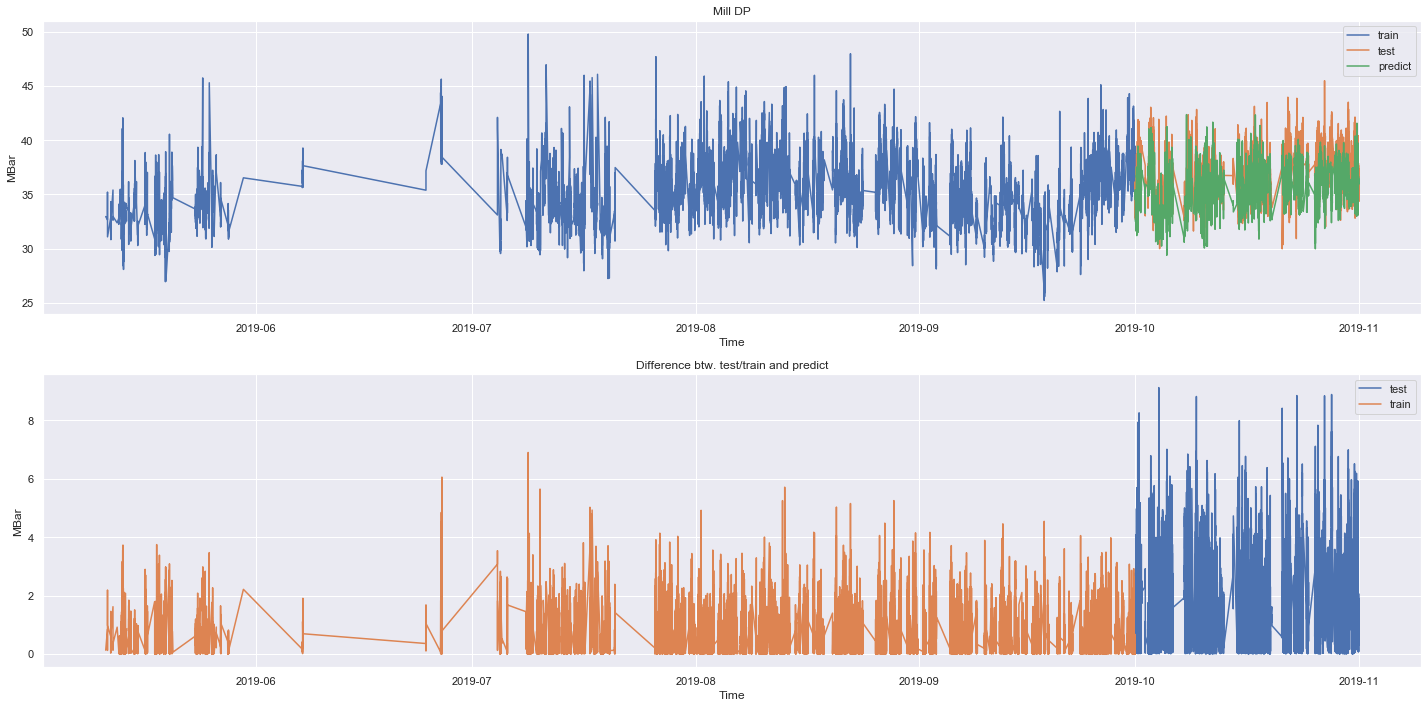

In [25]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, knn_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(knn_preds - y_test), label='test')
ax2.plot(np.abs(knn_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

# Bayesian Ridge Regression

In [26]:
# Import Model
from sklearn.linear_model import BayesianRidge
brd_model = joblib.load('brd_2.sav')

# Define Model with Grid
brd_grid = {'alpha_1': [1e-06],
            'alpha_2': [1e-06],
            'n_iter': [300]}
brd_model = GridSearchCV(BayesianRidge(), brd_grid, cv=5)
brd_model.fit(X_train,y_train)
brd_preds = brd_model.predict(X_test)
brd_preds_train = brd_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
brd_mae = mean_absolute_error(brd_preds, y_test)
brd_mse = mean_squared_error(brd_preds, y_test)
brd_mae_train = mean_absolute_error(brd_preds_train, y_train)
brd_mse_train = mean_squared_error(brd_preds_train, y_train)
print('Bayesian Ridge: ', brd_mae, brd_mse)
print('Bayesian Ridge: ', brd_mae_train, brd_mse_train)

Bayesian Ridge:  0.45342308220966404 0.4057932639037346
Bayesian Ridge:  0.4474552341416555 0.41387090383460756


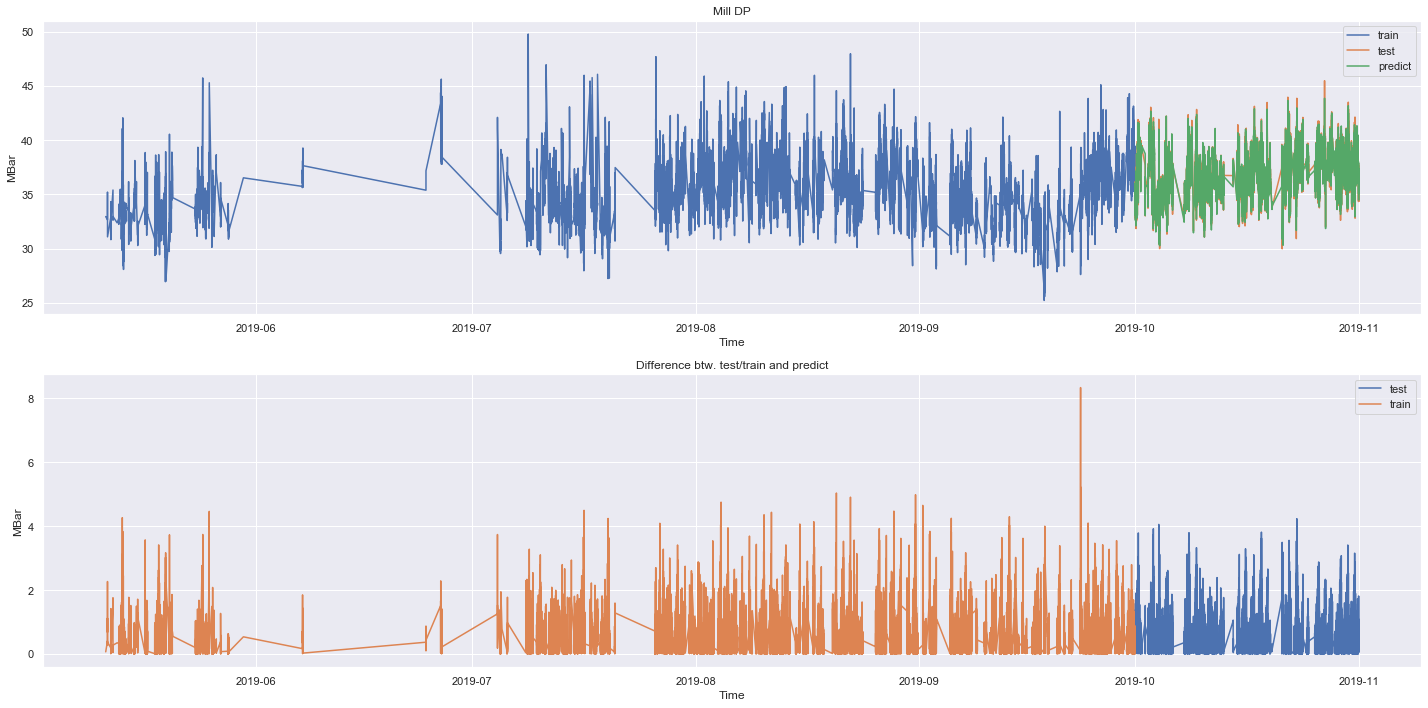

In [27]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, brd_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(brd_preds - y_test), label='test')
ax2.plot(np.abs(brd_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

# Polynomial

In [28]:
# Import Model
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
poly_model = joblib.load('poly_2.sav')

# Define Model with Pipeline
poly_model = Pipeline([('poly', PolynomialFeatures(degree=2)),
                       ('linear', LinearRegression(fit_intercept=False))])
poly_model.fit(X_train,y_train)
poly_preds = poly_model.predict(X_test)
poly_preds_train = poly_model.predict(X_train)

# Mean Absolute Error and Mean Squared Error
poly_mae = mean_absolute_error(poly_preds, y_test)
poly_mse = mean_squared_error(poly_preds, y_test)
poly_mae_train = mean_absolute_error(poly_preds_train, y_train)
poly_mse_train = mean_squared_error(poly_preds_train, y_train)
print('Polynomial: ', poly_mae, poly_mse)
print('Polynomial: ', poly_mae_train, poly_mse_train)

Polynomial:  0.5340820419302511 0.8740188749643022
Polynomial:  0.4401448988590261 0.39325403596769926


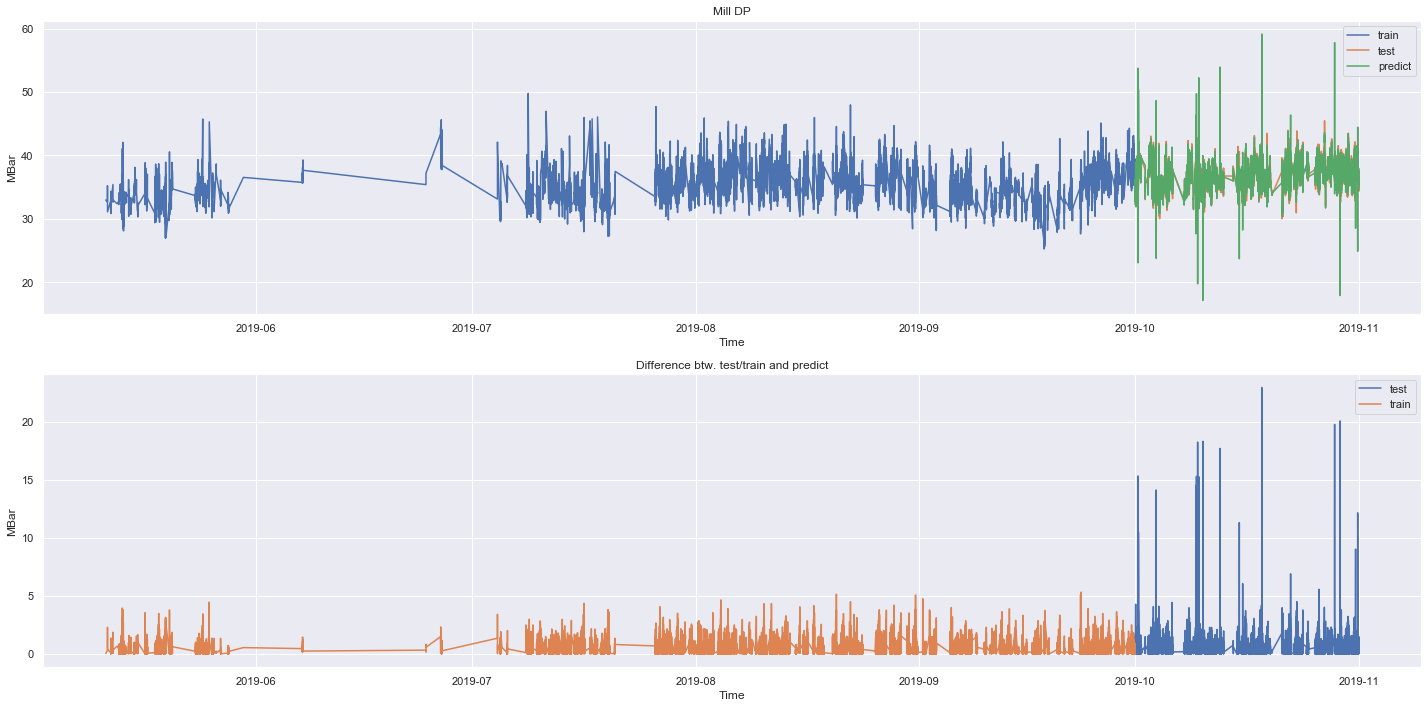

In [29]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, poly_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(poly_preds - y_test), label='test')
ax2.plot(np.abs(poly_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

## XGBooster


In [30]:
# Import Model
from xgboost import XGBRegressor
XGB = joblib.load('XGB_2.sav')

# # Define Model with Grid
# XGB_grid = {'n_estimators': [400],
# #             'learning_rate': [.05],
#             'objective': ['reg:squarederror'],
#             'n_jobs':[4]}

# XGB = GridSearchCV(XGBRegressor(), XGB_grid, cv=5)
# XGB.fit(X_train, y_train)
XGB_preds = XGB.predict(X_test)
XGB_preds_train = XGB.predict(X_train)

# Mean Absolute Error and Mean Squared Error
XGB_mae = mean_absolute_error(XGB_preds, y_test)
XGB_mse = mean_squared_error(XGB_preds, y_test)
XGB_mae_train = mean_absolute_error(XGB_preds_train, y_train)
XGB_mse_train = mean_squared_error(XGB_preds_train, y_train)
print("XGBooster: ", XGB_mae, XGB_mse)
print("XGBooster: ", XGB_mae_train, XGB_mse_train)

XGBooster:  0.46072277041440485 0.41885638007454745
XGBooster:  0.4262253185545184 0.36582480169845083


In [31]:
XGB.best_params_

{'n_estimators': 400, 'n_jobs': 4, 'objective': 'reg:squarederror'}

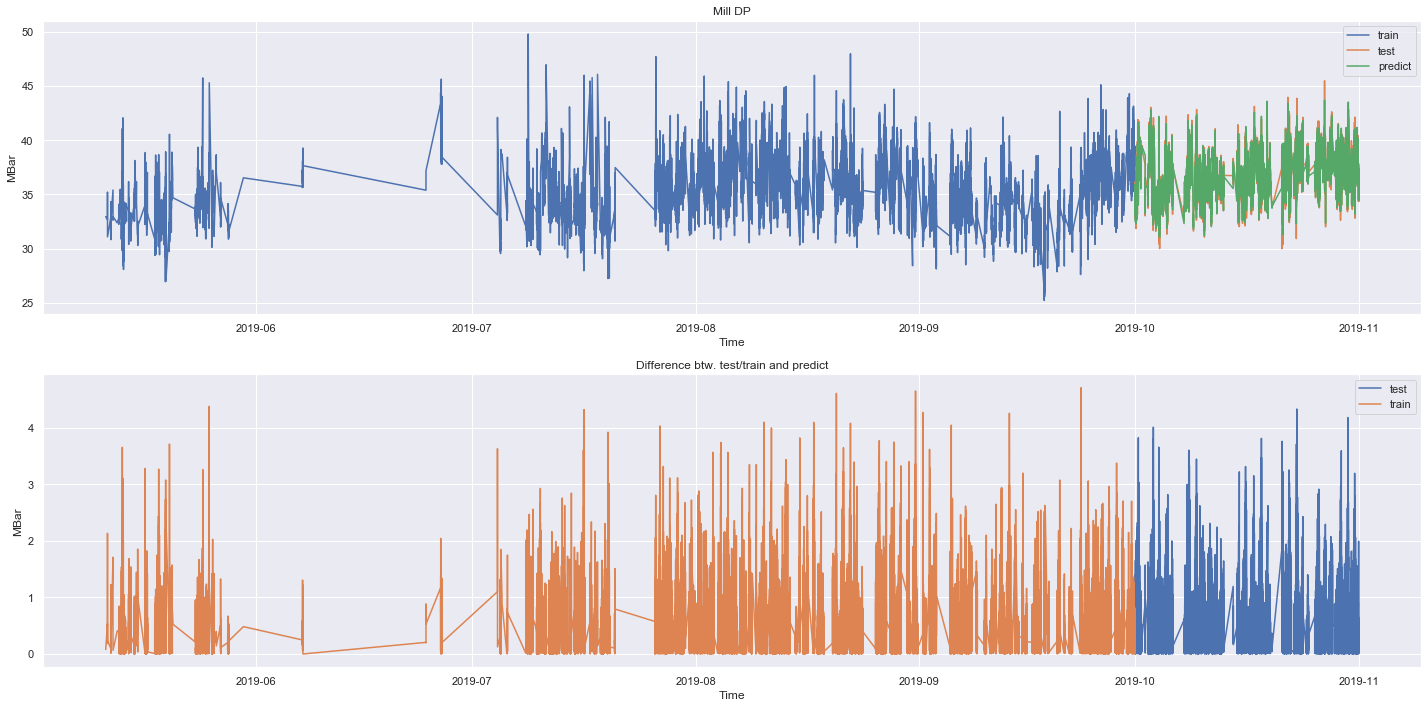

In [32]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')
ax.plot(test_data.index, XGB_preds, label='predict')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('MBar')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(XGB_preds - y_test), label='test')
ax2.plot(np.abs(XGB_preds_train - y_train), label='train')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('MBar')
ax2.legend()

plt.tight_layout()

# Gradient Boosting Regressor

In [33]:
# Import Model
from sklearn.ensemble import GradientBoostingRegressor
GBR = joblib.load('GBR_2.sav')

# # Define Model with Grid
# GBR_grid = {'n_estimators': [400],
# #             'learning_rate': [.05],
#             'verbose': [0],
#             'warm_start': [False]}

# GBR = GridSearchCV(GradientBoostingRegressor(), GBR_grid, cv=5)
# GBR.fit(X_train, y_train)
GBR_preds = GBR.predict(X_test)
GBR_preds_train = GBR.predict(X_train)

# Mean Absolute Error and Mean Squared Error
GBR_mae = mean_absolute_error(GBR_preds, y_test)
GBR_mse = mean_squared_error(GBR_preds, y_test)
GBR_mae_train = mean_absolute_error(GBR_preds_train, y_train)
GBR_mse_train = mean_squared_error(GBR_preds_train, y_train)
print("GBR: ", GBR_mae, GBR_mse)
print("GBR: ", GBR_mae_train, GBR_mse_train)

GBR:  0.462932900469521 0.43161083323905197
GBR:  0.45713947399333926 0.4338280986559702


In [34]:
# save the model to disk
# joblib.dump(GBR, 'GBR_2.sav')
 
# some time later...
 
# load the model from disk
# GBR = joblib.load('GBR_2.sav')

In [35]:
GBR.best_params_

{'learning_rate': 0.05, 'n_estimators': 95, 'verbose': 0, 'warm_start': False}

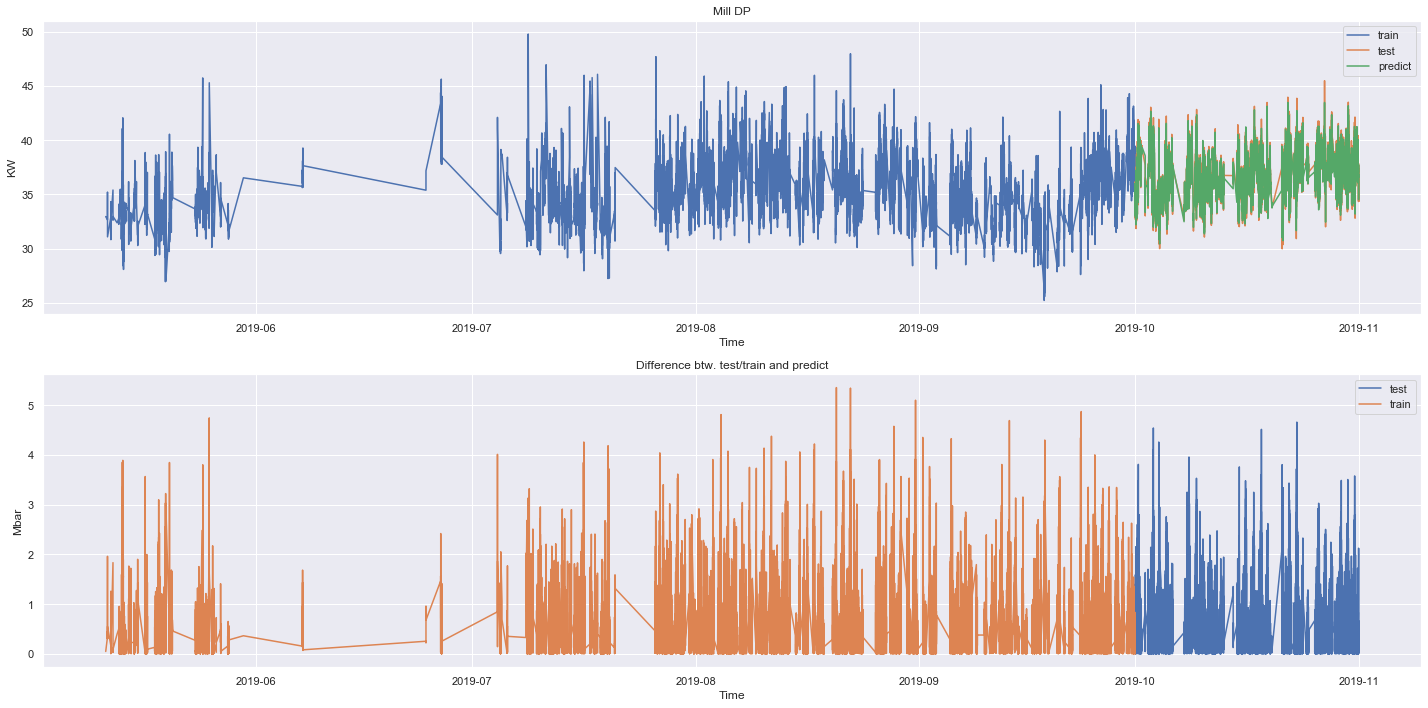

In [36]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,10))
ax = plt.subplot(211)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')#, marker='*', ls='')
ax.set_xlim()
ax.plot(test_data.index, GBR_preds, label='predict')#, marker='o', ls='')
ax.set_title('Mill DP')
ax.set_xlabel('Time')
ax.set_ylabel('KW')
ax.legend()

ax2 = plt.subplot(212)
ax2.plot(np.abs(GBR_preds - y_test), label='test')
ax2.plot(np.abs(GBR_preds_train - y_train), label='train') #, marker='*', ls='')
ax2.set_title('Difference btw. test/train and predict')
ax2.set_xlabel('Time')
ax2.set_ylabel('Mbar')
ax2.legend()

plt.tight_layout()

In [37]:
mae_error=[lr_mae, ls_mae, rd_mae, knn_mae, brd_mae, poly_mae, XGB_mae, GBR_mae]
mse_error=[lr_mse, ls_mse, rd_mse, knn_mse, brd_mse, poly_mse, XGB_mse, GBR_mse]

mae_error_train=[lr_mae_train, ls_mae_train, rd_mae_train, knn_mae_train, brd_mae_train, poly_mae_train, XGB_mae_train, GBR_mae_train]
mse_error_train=[lr_mse_train, ls_mse_train, rd_mse_train, knn_mse_train, brd_mse_train, poly_mse_train, XGB_mse_train, GBR_mse_train]


col = {'Mean Average Error':mae_error,'Mean Average Error TRAIN':mae_error_train,'Mean Squared Error':mse_error,'Mean Squared Error TRAIN':mse_error_train}
models = ['Linear', 'Lasso', 'Ridge', 'KNN','Bayesian Ridge', 'Polynomial', 'XGBooster', 'GBR']
df = pd.DataFrame(data=col,index=models)
df

,Mean Average Error,Mean Average Error TRAIN,Mean Squared Error,Mean Squared Error TRAIN
Linear,0.453701,0.447492,0.406164,0.413850
Lasso,0.453612,0.447515,0.405977,0.413918
Ridge,0.453533,0.447467,0.405936,0.413857
KNN,1.768077,0.479858,4.924047,0.495053
Bayesian Ridge,0.453423,0.447455,0.405793,0.413871
Polynomial,0.534082,0.440145,0.874019,0.393254
XGBooster,0.460723,0.426225,0.418856,0.365825
GBR,0.462933,0.457139,0.431611,0.433828


## Ensemble

In [38]:
# Ensemble
ens = pd.DataFrame(data = {#'lr_preds': lr_preds,
                      #   'ls_preds': ls_preds,
                      #  'rd_preds': rd_preds,
                     #    'brd_preds': brd_preds,
                         'XGB_preds': XGB_preds,
                         'GBR_preds': GBR_preds},
                   index = y_test.index)
                         
ens_train = pd.DataFrame(data = {#'lr_preds_train': lr_preds_train,
                                #'ls_preds_train': ls_preds_train,
                                #'rd_preds_train': rd_preds_train,
                                #'brd_preds_train': brd_preds_train,
                                'XGB_preds_train': XGB_preds_train,
                                'GBR_preds_train': GBR_preds_train},
                         index = y_train.index)

In [39]:
ens, ens_train

(                     XGB_preds  GBR_preds
 date                                     
 2019-10-01 00:00:00  34.655567  34.772446
 2019-10-01 00:01:00  35.797546  35.676031
 2019-10-01 00:02:00  35.550278  35.663733
 2019-10-01 00:03:00  35.394035  35.472965
 2019-10-01 00:04:00  34.975601  35.056587
 ...                        ...        ...
 2019-10-31 23:50:00  35.412739  35.398699
 2019-10-31 23:51:00  34.439632  34.543727
 2019-10-31 23:52:00  34.867573  34.734916
 2019-10-31 23:53:00  37.213020  36.825098
 2019-10-31 23:54:00  36.720058  36.839649
 
 [19314 rows x 2 columns],
                      XGB_preds_train  GBR_preds_train
 date                                                 
 2019-05-11 03:15:00        32.870853        33.000617
 2019-05-11 09:01:00        32.116127        32.312146
 2019-05-11 09:02:00        32.677078        32.730301
 2019-05-11 09:03:00        32.236649        32.430229
 2019-05-11 09:04:00        31.875105        32.137946
 ...                       

In [40]:
ens['avg'] = ens.mean(axis=1)
ens_train['avg'] = ens_train.mean(axis=1)

In [41]:
# Mean Absolute Error and Mean Squared Error
ens_mae = mean_absolute_error(ens['avg'], y_test)
ens_mse = mean_squared_error(ens['avg'], y_test)
print("Ensemble Test Errors: ", ens_mae, ens_mse)

ens_mae_train = mean_absolute_error(ens_train['avg'], y_train)
ens_mse_train = mean_squared_error(ens_train['avg'], y_train)
print("Ensemble Train Errors: ", ens_mae_train, ens_mse_train)

Ensemble Test Errors:  0.457607655857786 0.4179737218556433
Ensemble Train Errors:  0.43854586868600215 0.39277767150623266


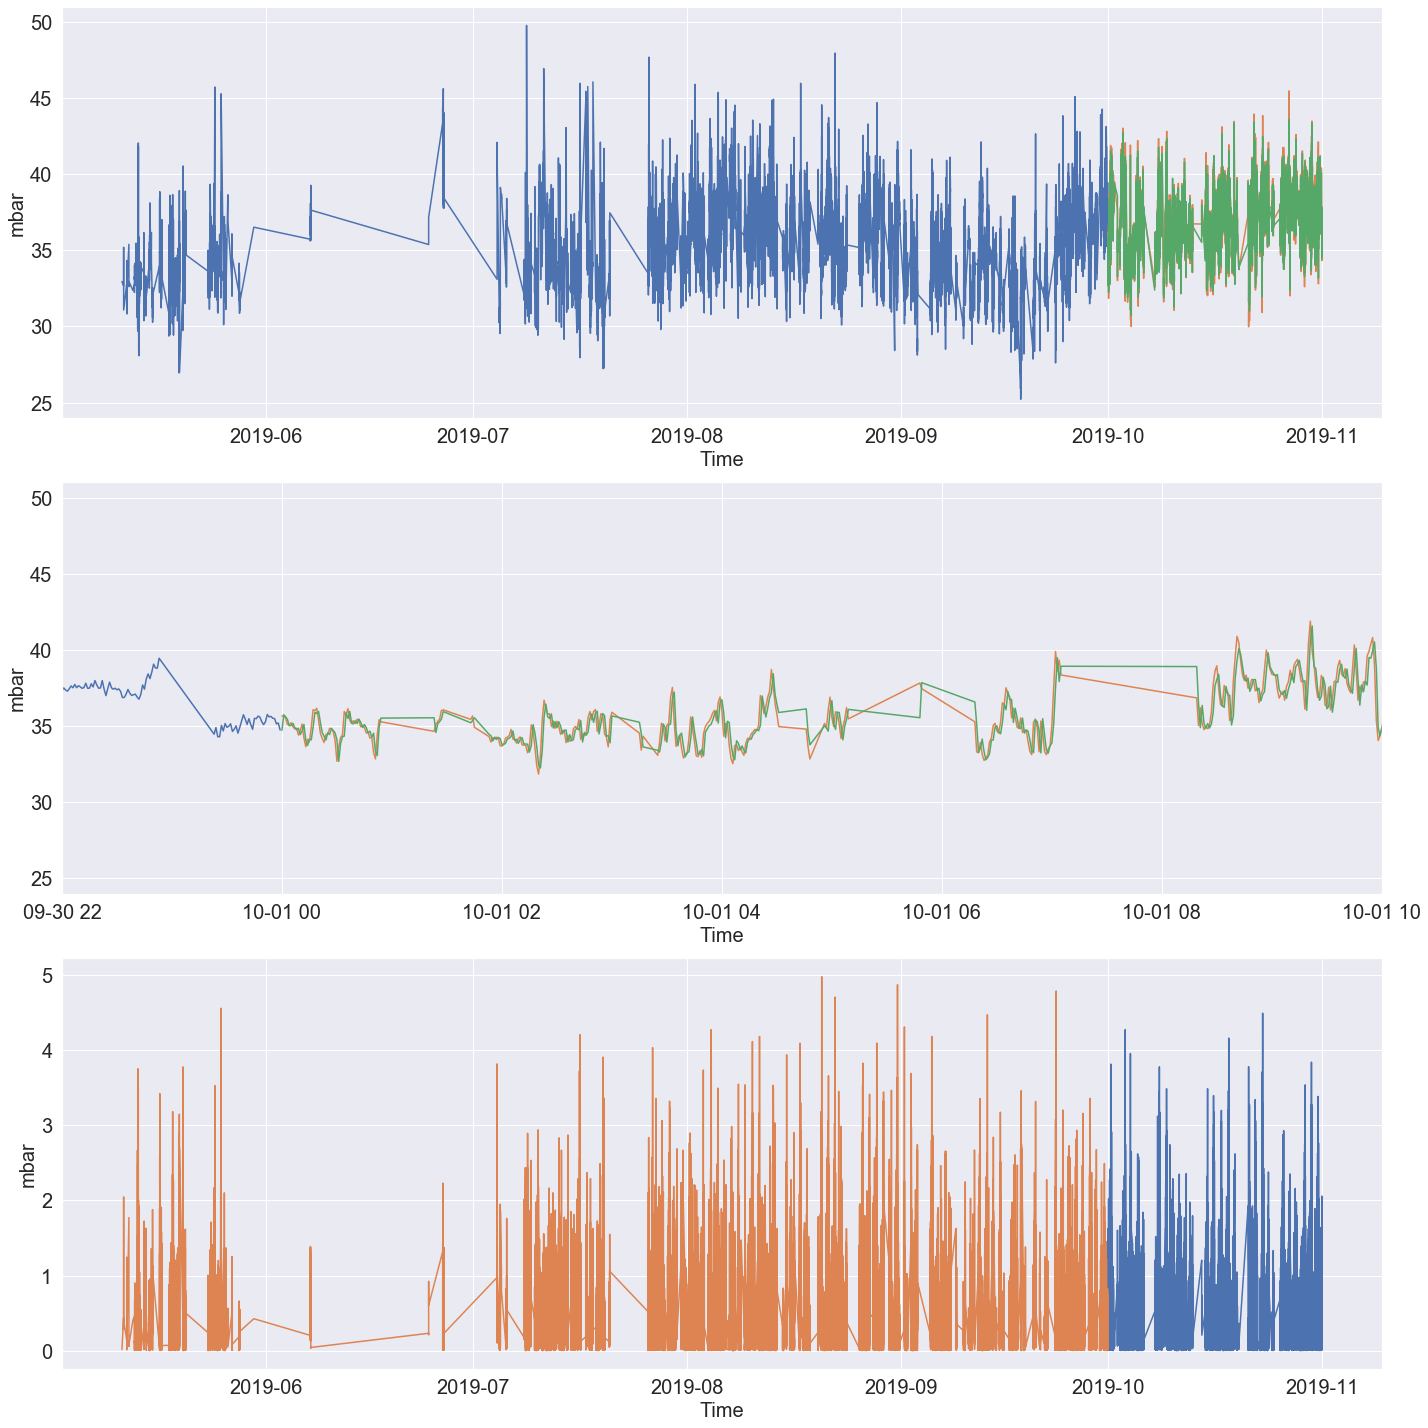

In [42]:
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
fig = plt.figure(figsize = (20,20))
ax = plt.subplot(311)
ax.plot(train_data['mill_dp_mbar_pv'], label='train')
ax.plot(test_data['mill_dp_mbar_pv'], label='test')#, marker='*', ls='')
ax.set_xlim()
ax.plot(test_data.index, ens['avg'], label='predict')#, marker='o', ls='')
# ax.set_title('Mill DP', size=20)
ax.set_xlabel('Time', size=20)
ax.set_ylabel('mbar', size=20)
ax.tick_params(labelsize=20)
# ax.legend()

ax2 = plt.subplot(312)
ax2.plot(train_data['mill_dp_mbar_pv'], label='train')
ax2.plot(test_data['mill_dp_mbar_pv'], label='test')#, marker='*', ls='')
ax2.plot(test_data.index, ens['avg'], label='predict')#, marker='o', ls='')
# ax2.set_title('Mill DP', size=20)
ax2.set_xlabel('Time', size=20)
ax2.set_ylabel('mbar', size=20)
ax2.tick_params(labelsize=20)
ax2.set_xlim(['2019-09-30 22:00:00','2019-10-01 10:00:00'])
# ax2.legend()

ax3 = plt.subplot(313)
ax3.plot(np.abs(ens['avg'] - y_test), label='test')
ax3.plot(np.abs(ens_train['avg'] - y_train), label='train') #, marker='*', ls='')
# ax3.set_title('Difference btw. test/train and predict', size=20)
# ax2.set_xlim(['2019-10-01 00:00:00','2019-10-01 01:00:00'])
ax3.tick_params(labelsize=20)
ax3.set_xlabel('Time', size=20)
ax3.set_ylabel('mbar', size=20)
# ax3.legend()

plt.tight_layout()
plt.savefig('ensemble_task2.png')

# Recursive Strategy

In [43]:
# # Recursive Strategy only for next minute with Linear
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)    

# for i in range(0, 10):
#     lr_preds = lin_reg.predict(X_test.values.reshape(1, -1))
#     lr_preds_train = lin_reg.predict(X_train)
#     print(i, lr_preds)
#     if i<5:
#         X_test['KW_%i'%i] = lr_preds[0]
#         X_test.drop(['separator_pwr_kw_pv_%i'%(5-i)], inplace=True)
#     else:
#         X_test['KW_%i'%i] = lr_preds[0]
#         X_test.drop(['KW_%i'%(i-5)], inplace=True)

In [44]:
# Recursive Strategy for the whole month with Linear
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)    

X = X_test.copy(deep=True)
y = y_test.copy(deep=True)

for i in range(0, 5):
    lr_preds = lin_reg.predict(X)
    lr_mae = mean_absolute_error(lr_preds, y)
    lr_mse = mean_squared_error(lr_preds, y)
    print("Linear: ", lr_mae, lr_mse)
    if i == 0:
        b = X['mill_dp_mbar_pv_1'].shift(1)
        b[1] = lr_preds[0]
        X['MB_0'] = b
        X = X.drop(['mill_dp_mbar_pv_5'], axis=1)
        p_lin = pd.DataFrame(data=lr_preds, index=X.index, columns=['P%i'%i])
        X = X[1:]
        y = y[1:]      
    else:
        b = X['MB_%i'%(i-1)].shift(1)
        b[1] = lr_preds[0]
        X['MB_%i'%i] = b
        X.drop(['mill_dp_mbar_pv_%i'%(5-i)], axis=1, inplace=True)
        dt1 = pd.DataFrame(data=lr_preds, index=X.index, columns=['P%i'%i])
        p_lin = p_lin.join(dt1, sort=True)
        X = X[1:]
        y = y[1:]

Linear:  0.45370138191482245 0.406163799122347
Linear:  20.550530445437385 425.1500510979121
Linear:  2.9491111780850527 10.276169846877428
Linear:  9.422717183012674 94.7242917954736
Linear:  45.80365624245064 2105.6749420370256


In [45]:
X

,total_feed_ton_h_pv_7,total_feed_ton_h_pv_8,total_feed_ton_h_pv_9,total_feed_ton_h_pv_10,total_feed_ton_h_pv_11,total_feed_ton_h_pv_12,fly_ash_1_perc_pv_17,fly_ash_1_perc_pv_18,fly_ash_1_perc_pv_19,fly_ash_1_perc_pv_20,...,bucket_elv_mtr_pwr_kw_pv_6,bucket_elv_mtr_pwr_kw_pv_7,bucket_elv_mtr_pwr_kw_pv_8,bucket_elv_mtr_pwr_kw_pv_9,bucket_elv_mtr_pwr_kw_pv_10,MB_0,MB_1,MB_2,MB_3,MB_4
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:05:00,90.810,91.130,91.805,91.125,91.355,91.100,31.150,30.935,30.495,31.155,...,4.980,4.970,4.980,4.995,4.950,35.115,35.505,35.665,35.650,-5.136523
2019-10-01 00:06:00,91.190,90.810,91.130,91.805,91.125,91.355,30.305,31.150,30.935,30.495,...,4.970,4.980,4.970,4.980,4.995,35.050,35.115,35.505,35.665,35.650000
2019-10-01 00:07:00,91.710,91.190,90.810,91.130,91.805,91.125,31.490,30.305,31.150,30.935,...,4.935,4.970,4.980,4.970,4.980,35.220,35.050,35.115,35.505,35.665000
2019-10-01 00:08:00,90.580,91.710,91.190,90.810,91.130,91.805,30.495,31.490,30.305,31.150,...,4.950,4.935,4.970,4.980,4.970,34.950,35.220,35.050,35.115,35.505000
2019-10-01 00:09:00,91.095,90.580,91.710,91.190,90.810,91.130,31.520,30.495,31.490,30.305,...,4.925,4.950,4.935,4.970,4.980,34.810,34.950,35.220,35.050,35.115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:50:00,90.330,88.650,88.425,88.470,89.165,88.375,31.035,30.970,30.670,31.130,...,5.010,4.985,4.955,5.015,5.010,35.605,35.635,36.730,36.640,35.420000
2019-10-31 23:51:00,89.140,90.330,88.650,88.425,88.470,89.165,30.825,31.035,30.970,30.670,...,4.975,5.010,4.985,4.955,5.015,35.310,35.605,35.635,36.730,36.640000
2019-10-31 23:52:00,91.835,89.140,90.330,88.650,88.425,88.470,30.965,30.825,31.035,30.970,...,4.995,4.975,5.010,4.985,4.955,34.360,35.310,35.605,35.635,36.730000


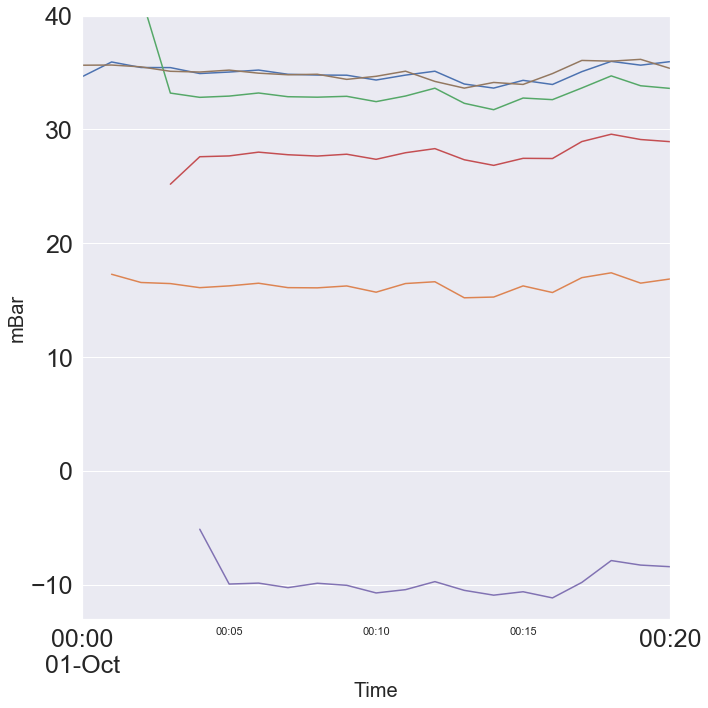

In [46]:
sns.set(rc={'figure.figsize':(10, 10)})
p_lin2 = p_lin.copy()
p_lin2['target'] = y_test.values
p_lin2['2019-10-01 00:00:00':'2019-10-01 00:20:00'].plot(legend=None)
# plt.title('Prediction 5mins later with Linear Regression', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('mBar', size=20)
plt.ylim(-13, 40)
plt.tick_params(labelsize=25)
# plt.legend(None)
plt.tight_layout()
plt.savefig('rec_Lin_task2.png')

## GBR

In [47]:
# Recursive Strategy for the whole month with GBR
from sklearn.ensemble import GradientBoostingRegressor

# Define Model with Grid
# GBR_grid = {'n_estimators': [95],
#             'learning_rate': [0.05],
#             'verbose': [0],
#             'warm_start': [False]}

# GBR = GridSearchCV(GradientBoostingRegressor(), GBR_grid, cv=5)
# GBR.fit(X_train, y_train)
GBR_preds_train = GBR.predict(X_train)

X = X_test.copy(deep=True)
y = y_test.copy(deep=True)

for i in range(0, 5):
    GBR_preds = GBR.predict(X)
    GBR_mae = mean_absolute_error(GBR_preds, y)
    GBR_mse = mean_squared_error(GBR_preds, y)
    print("GBR: ", GBR_mae, GBR_mse)
    if i == 0:
        b = X['mill_dp_mbar_pv_1'].shift(1)
        b[1] = GBR_preds[0]
        X['MB_0'] = b
        X = X.drop(['mill_dp_mbar_pv_5'], axis=1)
        preds = pd.DataFrame(data=GBR_preds, index=X.index, columns=['P%i'%i])
        X = X[1:]
        y = y[1:]      
    else:
        b = X['MB_%i'%(i-1)].shift(1)
        b[1] = GBR_preds[0]
        X['MB_%i'%i] = b
        X.drop(['mill_dp_mbar_pv_%i'%(5-i)], axis=1, inplace=True)
        dt1 = pd.DataFrame(data=GBR_preds, index=X.index, columns=['P%i'%i])
        preds = preds.join(dt1, sort=True)
        X = X[1:]
        y = y[1:]

GBR:  0.462932900469521 0.43161083323905197
GBR:  0.4663862187133224 0.43239906299418074
GBR:  0.46661868640193965 0.43283080938969226
GBR:  0.4675644869443051 0.4348635843138704
GBR:  0.5075211271803834 0.49405884941121225


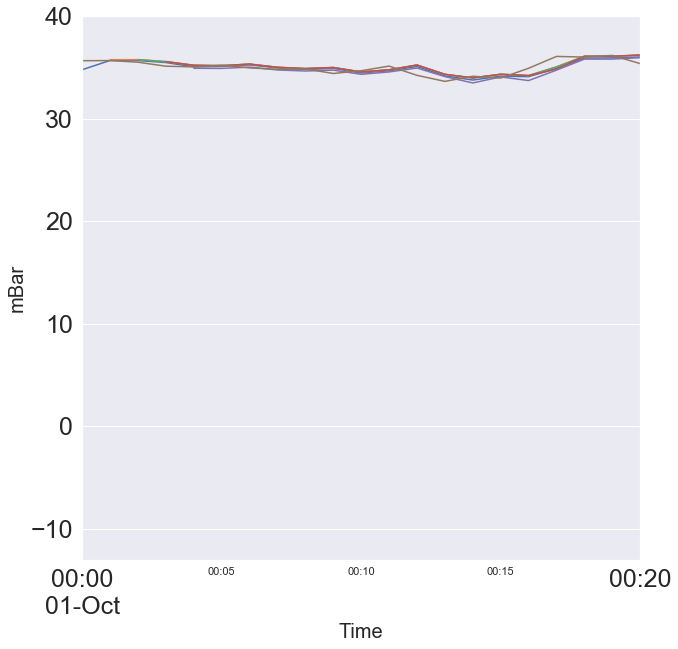

In [48]:
sns.set(rc={'figure.figsize':(10, 10)})
preds2 = preds.copy()
preds2['target'] = y_test.values
preds2['2019-10-01 00:00:00':'2019-10-01 00:20:00'].plot(legend=None)
# plt.title('Prediction 5mins later with Gradient Booster Regressor', size=20)
plt.xlabel('Time', size=20)
plt.ylabel('mBar', size=20)
plt.tick_params(labelsize=25)
plt.ylim(-13, 40)
# plt.legend(loc = 'upper right', fontsize='xx-large')
# plt.tight_layout()
plt.savefig('rec_GBR_task2.png')

In [49]:
preds2

,P0,P1,P2,P3,P4,target
date,,,,,,
2019-10-01 00:00:00,34.772446,NaN,NaN,NaN,NaN,35.650
2019-10-01 00:01:00,35.676031,35.750842,NaN,NaN,NaN,35.665
2019-10-01 00:02:00,35.663733,35.755673,35.755673,NaN,NaN,35.505
2019-10-01 00:03:00,35.472965,35.561023,35.561023,35.561023,NaN,35.115
2019-10-01 00:04:00,35.056587,35.205924,35.202041,35.202041,34.911181,35.050
...,...,...,...,...,...,...
2019-10-31 23:50:00,35.398699,35.422202,35.418728,35.413278,35.107988,34.360
2019-10-31 23:51:00,34.543727,34.567230,34.563756,34.558306,34.343670,34.640
2019-10-31 23:52:00,34.734916,34.830066,34.826593,34.821142,34.551983,36.860


In [50]:
X

,total_feed_ton_h_pv_7,total_feed_ton_h_pv_8,total_feed_ton_h_pv_9,total_feed_ton_h_pv_10,total_feed_ton_h_pv_11,total_feed_ton_h_pv_12,fly_ash_1_perc_pv_17,fly_ash_1_perc_pv_18,fly_ash_1_perc_pv_19,fly_ash_1_perc_pv_20,...,bucket_elv_mtr_pwr_kw_pv_6,bucket_elv_mtr_pwr_kw_pv_7,bucket_elv_mtr_pwr_kw_pv_8,bucket_elv_mtr_pwr_kw_pv_9,bucket_elv_mtr_pwr_kw_pv_10,MB_0,MB_1,MB_2,MB_3,MB_4
date,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:05:00,90.810,91.130,91.805,91.125,91.355,91.100,31.150,30.935,30.495,31.155,...,4.980,4.970,4.980,4.995,4.950,35.115,35.505,35.665,35.650,34.911181
2019-10-01 00:06:00,91.190,90.810,91.130,91.805,91.125,91.355,30.305,31.150,30.935,30.495,...,4.970,4.980,4.970,4.980,4.995,35.050,35.115,35.505,35.665,35.650000
2019-10-01 00:07:00,91.710,91.190,90.810,91.130,91.805,91.125,31.490,30.305,31.150,30.935,...,4.935,4.970,4.980,4.970,4.980,35.220,35.050,35.115,35.505,35.665000
2019-10-01 00:08:00,90.580,91.710,91.190,90.810,91.130,91.805,30.495,31.490,30.305,31.150,...,4.950,4.935,4.970,4.980,4.970,34.950,35.220,35.050,35.115,35.505000
2019-10-01 00:09:00,91.095,90.580,91.710,91.190,90.810,91.130,31.520,30.495,31.490,30.305,...,4.925,4.950,4.935,4.970,4.980,34.810,34.950,35.220,35.050,35.115000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:50:00,90.330,88.650,88.425,88.470,89.165,88.375,31.035,30.970,30.670,31.130,...,5.010,4.985,4.955,5.015,5.010,35.605,35.635,36.730,36.640,35.420000
2019-10-31 23:51:00,89.140,90.330,88.650,88.425,88.470,89.165,30.825,31.035,30.970,30.670,...,4.975,5.010,4.985,4.955,5.015,35.310,35.605,35.635,36.730,36.640000
2019-10-31 23:52:00,91.835,89.140,90.330,88.650,88.425,88.470,30.965,30.825,31.035,30.970,...,4.995,4.975,5.010,4.985,4.955,34.360,35.310,35.605,35.635,36.730000


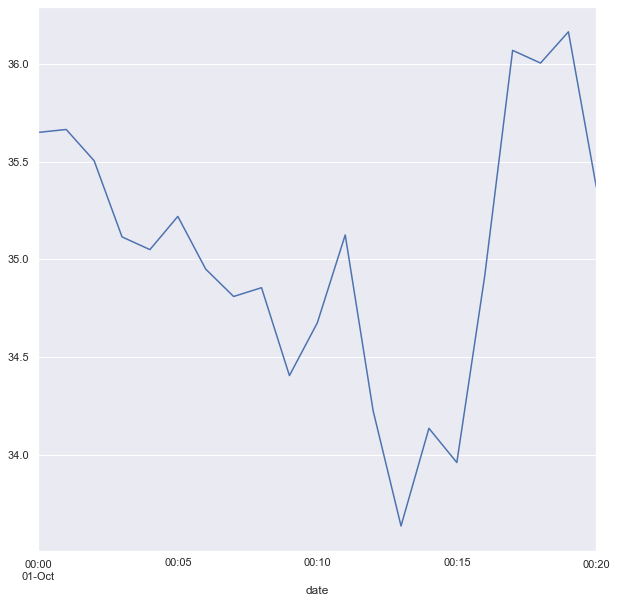

In [51]:
y_test['2019-10-01 00:00:00':'2019-10-01 00:20:00'].plot(figsize=((10,10)))

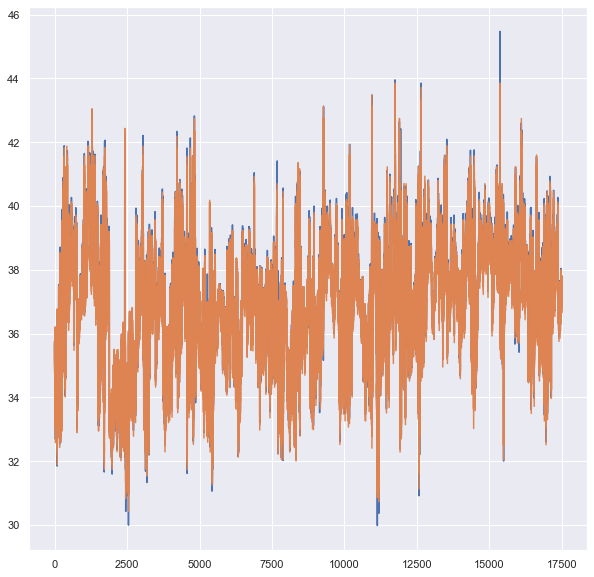

In [52]:
plt.plot(y_test['2019-10-01 00:00:00':'2019-10-30 00:00:00'].values)
# plt.plot([34.772446, 35.750842, 35.755673, 35.561023, 34.911181], c='C1')
# plt.plot(range(1, 6), [35.676031, 35.755673, 35.561023, 35.202041, 34.899618], c='C1')
for i in range(len(y_test['2019-10-01 00:00:00':'2019-10-30 00:00:00'].values)):
    plt.plot(range(i, i+5), [preds2['P0'][i], 
             preds2['P1'][i+1], 
             preds2['P2'][i+2],
             preds2['P3'][i+3],
             preds2['P4'][i+4]], c='C1')

 ...]

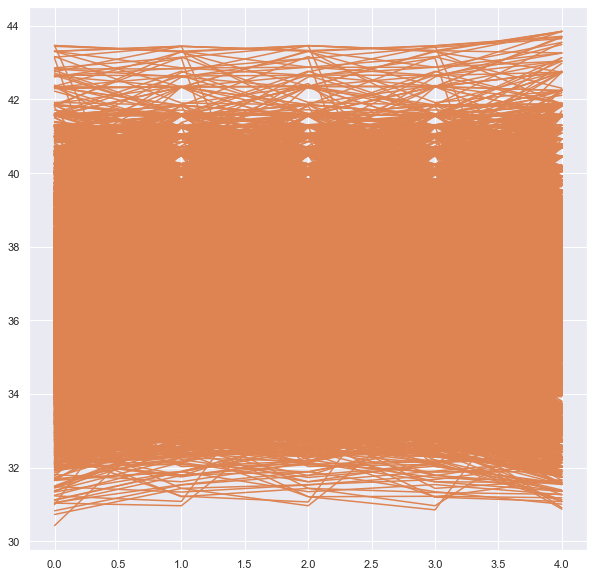

In [53]:
plt.plot([preds2['P0'], 
             preds2['P1'].shift(-1), 
             preds2['P2'].shift(-2),
             preds2['P3'].shift(-3),
             preds2['P4'].shift(-4)], c='C1')

In [54]:
preds2

,P0,P1,P2,P3,P4,target
date,,,,,,
2019-10-01 00:00:00,34.772446,NaN,NaN,NaN,NaN,35.650
2019-10-01 00:01:00,35.676031,35.750842,NaN,NaN,NaN,35.665
2019-10-01 00:02:00,35.663733,35.755673,35.755673,NaN,NaN,35.505
2019-10-01 00:03:00,35.472965,35.561023,35.561023,35.561023,NaN,35.115
2019-10-01 00:04:00,35.056587,35.205924,35.202041,35.202041,34.911181,35.050
...,...,...,...,...,...,...
2019-10-31 23:50:00,35.398699,35.422202,35.418728,35.413278,35.107988,34.360
2019-10-31 23:51:00,34.543727,34.567230,34.563756,34.558306,34.343670,34.640
2019-10-31 23:52:00,34.734916,34.830066,34.826593,34.821142,34.551983,36.860
